In [0]:
"""
经验：符号常量总是优于字面常量，枚举类型是定义符号常量的最佳选择
"""
from enum import Enum, unique

import random


@unique
class Suite(Enum):
    """花色"""

    SPADE, HEART, CLUB, DIAMOND = range(4)

    def __lt__(self, other):
        return self.value < other.value


class Card():
    """牌"""

    def __init__(self, suite, face):
        """初始化方法"""
        self.suite = suite
        self.face = face

    def show(self):
        """显示牌面"""
        suites = ['♠︎', '♥︎', '♣︎', '♦︎']
        faces = ['', 'A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
        return f'{suites[self.suite.value]}{faces[self.face]}'

    def __repr__(self):
        return self.show()


class Poker():
    """扑克"""

    def __init__(self):
        self.index = 0
        self.cards = [Card(suite, face)
                      for suite in Suite
                      for face in range(1, 14)]

    def shuffle(self):
        """洗牌（随机乱序）"""
        random.shuffle(self.cards)
        self.index = 0

    def deal(self):
        """发牌"""
        card = self.cards[self.index]
        self.index += 1
        return card

    @property
    def has_more(self):
        return self.index < len(self.cards)


class Player():
    """玩家"""

    def __init__(self, name):
        self.name = name
        self.cards = []

    def get_one(self, card):
        """摸一张牌"""
        self.cards.append(card)

    def sort(self, comp=lambda card: (card.suite, card.face)):
        """整理手上的牌"""
        self.cards.sort(key=comp)


def main():
    """主函数"""
    poker = Poker()
    poker.shuffle()
    players = [Player('东邪'), Player('西毒'), Player('南帝'), Player('北丐')]
    while poker.has_more:
        for player in players:
                player.get_one(poker.deal())
    for player in players:
        player.sort()
        print(player.name, end=': ')
        print(player.cards)


if __name__ == '__main__':
    main()

东邪: [♠︎3, ♠︎6, ♠︎8, ♥︎8, ♥︎Q, ♣︎A, ♣︎10, ♦︎2, ♦︎3, ♦︎7, ♦︎9, ♦︎J, ♦︎Q]
西毒: [♠︎A, ♠︎2, ♠︎7, ♠︎Q, ♥︎2, ♥︎6, ♥︎7, ♥︎9, ♣︎2, ♣︎4, ♣︎6, ♣︎8, ♦︎4]
南帝: [♠︎9, ♠︎J, ♠︎K, ♥︎3, ♥︎4, ♥︎5, ♥︎J, ♣︎7, ♣︎9, ♣︎Q, ♣︎K, ♦︎A, ♦︎8]
北丐: [♠︎4, ♠︎5, ♠︎10, ♥︎A, ♥︎10, ♥︎K, ♣︎3, ♣︎5, ♣︎J, ♦︎5, ♦︎6, ♦︎10, ♦︎K]


In [2]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


2.2.0


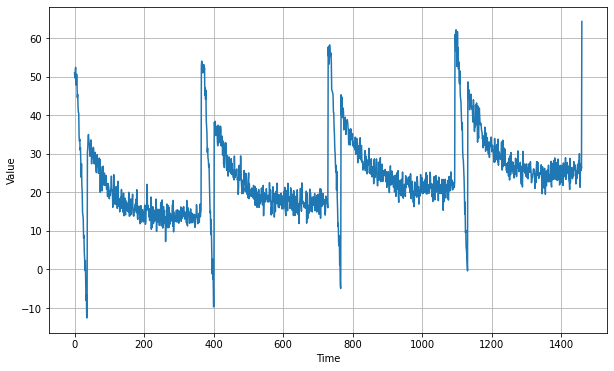

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

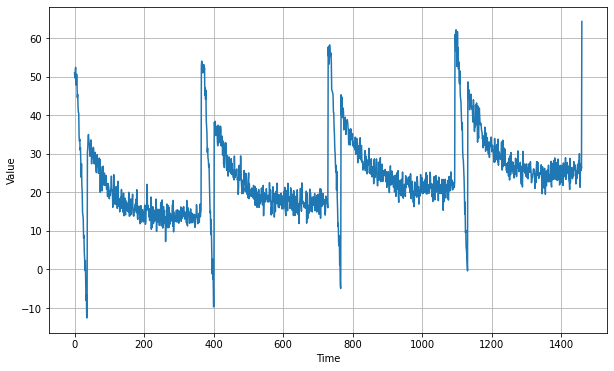

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [0]:
plt.show()


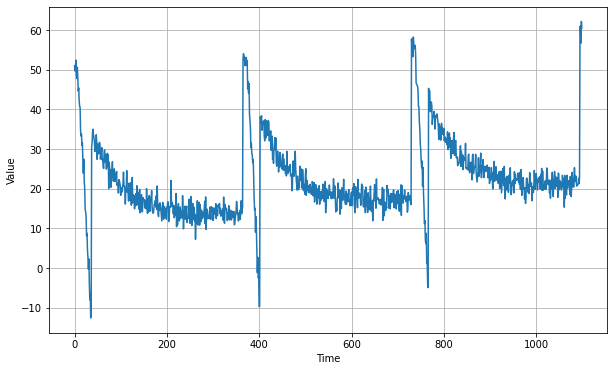

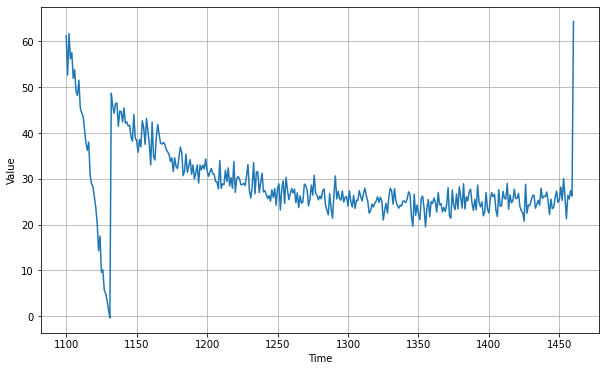

In [8]:
split_time = 1100
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

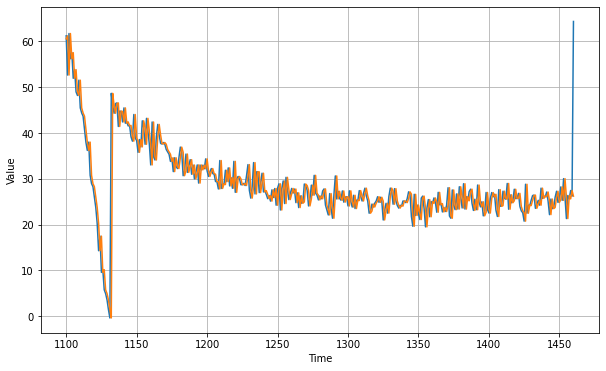

In [10]:
# naive forcast 
naive_forecast = series[split_time - 1:-1]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)


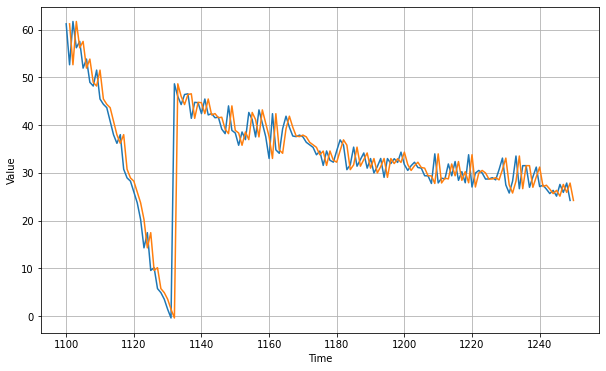

In [11]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

In [12]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

19.578304
2.6011968


In [0]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

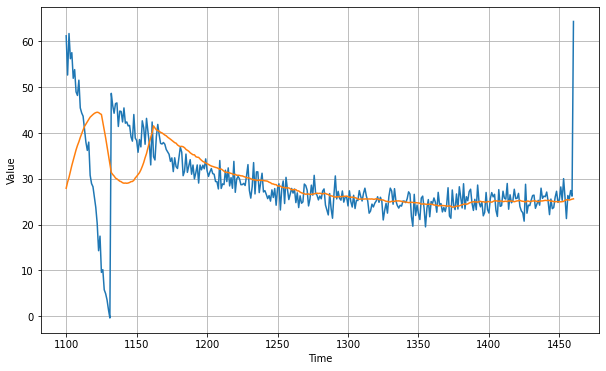

In [14]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [15]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

65.786224
4.3040023


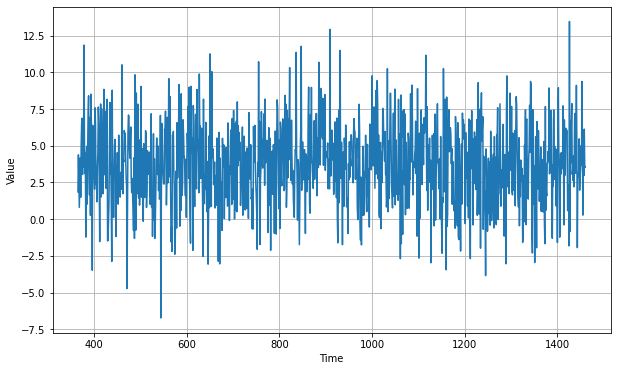

In [16]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

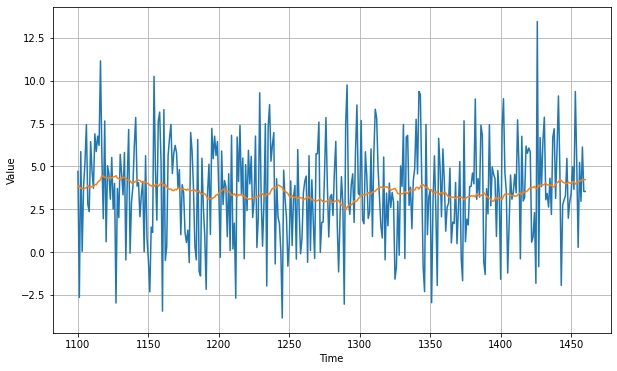

In [18]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

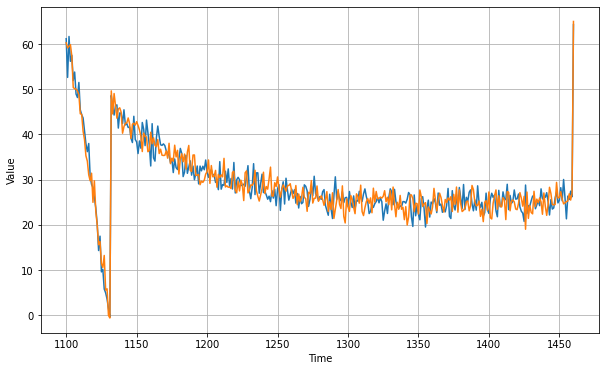

In [19]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [20]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

8.498155
2.327179


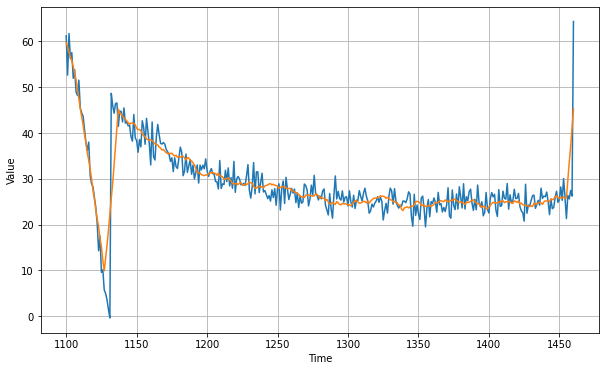

In [21]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [22]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

12.527958
2.2034433
